<a href="https://colab.research.google.com/github/joynaomi81/Sentiment-Analysis-Project/blob/main/Sentiment_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

### **Import** **necessary** **libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Load** **dataset**

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDB Dataset.csv')

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Shape** **of** **the** **dataset**

In [ ]:
data.shape

(50000, 2)

**Descriptive statistics of the dataset**

In [ ]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


**Summarry of the dataset**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


# **Data preprocessing**

**Check Missing Values**

In [ ]:
data.isnull().any()

,0
review,False
sentiment,False


In [ ]:
data.isnull().sum()

,0
review,0
sentiment,0


In [ ]:
data['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [ ]:
data.shape

(50000, 2)

## **Test** **normalization**

# **Import necessary libraries**

In [ ]:
import nltk
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer

In [ ]:
!pip install wordcloud

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS #Fixed case of wordcloud and removed extra wordcloud
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize

In [ ]:
!pip install textblob
#Installs the textblob package.
import spacy
import re, string, unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Function to clean and normalize text
def preprocess_text(text):
    # Remove HTML tags
    from bs4 import BeautifulSoup #Imports the BeautifulSoup module from bs4
    text = BeautifulSoup(text, 'html.parser').get_text()

    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Rejoin tokens into a single string
    return ' '.join(tokens)

# Apply preprocessing to the review text
data['cleaned_review'] = data['review'].apply(preprocess_text)

# Check the cleaned data
print(data.head())

<ipython-input-24-e5b6eed4b542>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


                                              review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                      cleaned_review  
0  one reviewer mentioned watching oz episode you...  
1  wonderful little production filming technique ...  
2  thought wonderful way spend time hot summer we...  
3  basically there family little boy jake think t...  
4  petter matteis love time money visually stunni...  


In [ ]:
data.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode you...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


# **Exploratory Data Analysis**

In [ ]:
data['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [ ]:
data.columns

Index(['review', 'sentiment', 'cleaned_review'], dtype='object')

In [ ]:
# Check for the last 5 rows
data.tail()

,review,sentiment,cleaned_review
49995,I thought this movie did a down right good job...,positive,thought movie right good job wasnt creative or...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,negative,catholic taught parochial elementary school nu...
49998,I'm going to have to disagree with the previou...,negative,im going disagree previous comment side maltin...
49999,No one expects the Star Trek movies to be high...,negative,one expects star trek movie high art fan expec...


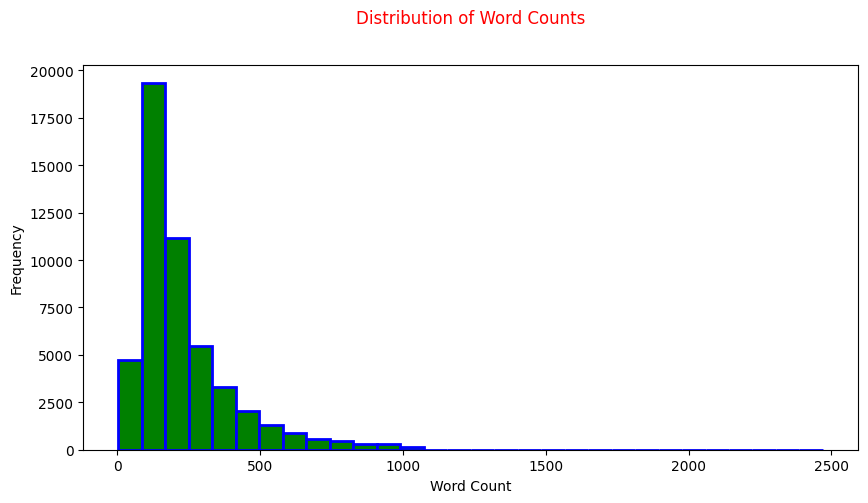

In [ ]:
data['word_count'] = data['review'].apply(lambda x: len(x.split()))
data['char_count'] = data['review'].apply(lambda x: len(x))

# Visualizing the distribution of word counts
data['word_count'].hist(bins=30)
data["word_count"].plot(kind = "hist", bins = 30, edgecolor = "blue", linewidth = 2, color = "green", figsize = (10,5))
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.title("Distribution of Word Counts", color = "red", pad = 30)


plt.show()

Text(0.5, 1.0, 'Distribution of sentiment')

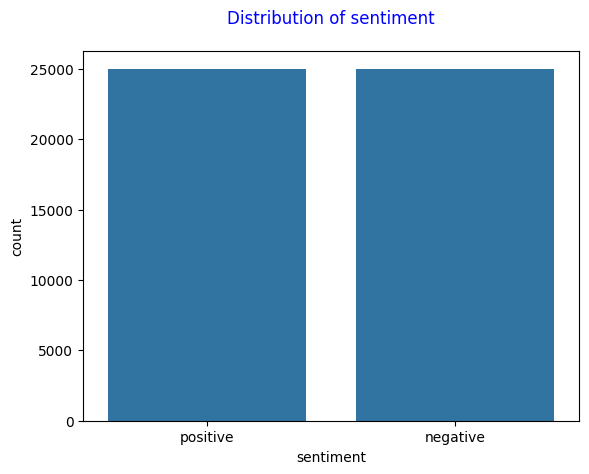

In [ ]:
# Plotting the distribution of sentiments
sns.countplot(x='sentiment', data=data)
plt.title("Distribution of sentiment", color = "blue", pad = 20)

# Pie Chart

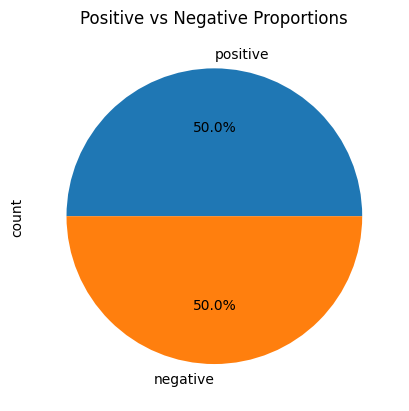

In [ ]:
data['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Positive vs Negative Proportions')
plt.show()


In [ ]:
# Checking class imbalance
print(data['sentiment'].value_counts(normalize=True))

sentiment
positive    0.5
negative    0.5
Name: proportion, dtype: float64


Both positive and negative classes have a proportion of 0.5, which means that 50% of the dataset belongs to the positive class and 50% belongs to the negative class (the data is balanced)

## **N**-**Gram** **Analysis**

In [ ]:

# Set the chunk size
chunk_size = 10000

# Initialize a list to collect processed bigrams from each chunk
bigram_frequencies = []

# Define the vectorizer for bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))

def process(chunk):
    # Fit and transform the text data in the chunk
    bigrams = vectorizer.fit_transform(chunk['review'])

    # Convert the sparse matrix to a DataFrame
    bigram_freq = pd.DataFrame(bigrams.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)

    # Return the frequency of bigrams
    return bigram_freq

# Process each chunk
for chunk in pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDB Dataset.csv', chunksize=chunk_size):
    chunk_bigram_freq = process(chunk)
    bigram_frequencies.append(chunk_bigram_freq)

# Combine the bigram frequencies from all chunks
final_bigram_freq = pd.concat(bigram_frequencies).groupby(level=0).sum().sort_values(ascending=False)

# Print the final bigram frequencies
print(final_bigram_freq.head(10))


br br         101088
of the         77259
in the         50252
this movie     31531
the film       26854
and the        26712
the movie      23895
to the         23709
to be          23492
this film      21815
dtype: int64


Text(0.5, 1.0, 'Polarity and Subjectivity Scores')

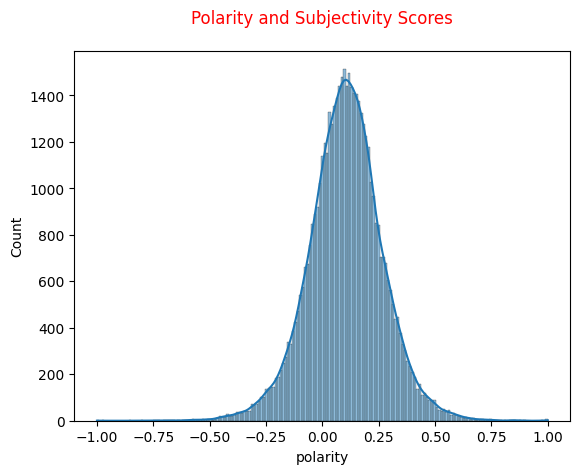

In [ ]:
from textblob import TextBlob
# Calculate polarity and subjectivity
data['polarity'] = data['review'].apply(lambda x: TextBlob(x).sentiment.polarity)
data['subjectivity'] = data['review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Visualize polarity distribution
sns.histplot(data['polarity'], kde=True)
plt.title("Polarity and Subjectivity Scores", color = "red", pad = 20)


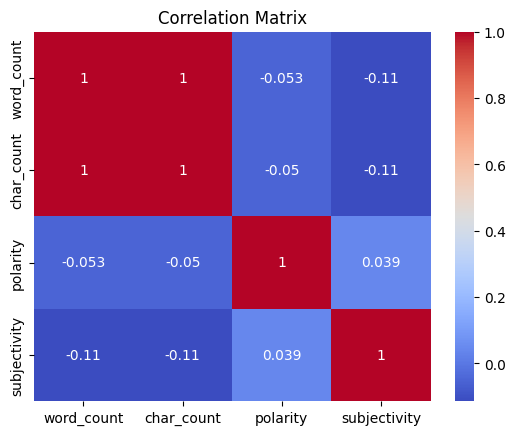

In [ ]:
# Plot the correlation matrix
corr_matrix = data[['word_count', 'char_count', 'polarity', 'subjectivity']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDB Dataset.csv')

# Prepare data
X = data['review']
y = data['sentiment']

# Split data into training and testing sets
train_reviews_data, test_reviews_data, train_labels, test_labels = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tf = TfidfVectorizer(min_df=1, max_df=2, binary=False, ngram_range=(1, 3))

# Fit and transform the training data
tf_train = tf.fit_transform(train_reviews_data)

# Transform the testing data
tf_test = tf.transform(test_reviews_data)

# Print the shape of the transformed training data
print('TF-IDF Train Shape:', tf_train.shape)
print('TF-IDF Test Shape:', tf_test.shape)


TF-IDF Train Shape: (37500, 6467510)
TF-IDF Test Shape: (12500, 6467510)


In [ ]:
#labeling the sentiment data
label=LabelBinarizer()
#transformed sentiment
sentiment_data=label.fit_transform(data['sentiment'])
print(sentiment_data.shape)

(50000, 1)


In [ ]:
train_data=data.sentiment[:30000]

In [ ]:
test_data=data.sentiment[30000:]

In [ ]:
#labeling the sentiment data
from sklearn.preprocessing import LabelBinarizer # Make sure to import the necessary module
label=LabelBinarizer()
#transformed sentiment
sentiment_data=label.fit_transform(data['sentiment']) # Assuming 'data' is a DataFrame with a 'sentiment' column
print(sentiment_data.shape)

sentiment_data # Now you can access sentiment_data in this cell

(50000, 1)


array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

## Model Training/ Model Evaluation

In [ ]:
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDB Dataset.csv')


In [ ]:
# Define features and labels
X = data['review']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
# Initialize the vectorizer
vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_transformed = vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
X_test_transformed = vectorizer.transform(X_test)


In [ ]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=1,max_df=2,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train=cv.fit_transform(train_reviews_data)
cv_test=cv.transform(test_reviews_data)

print('BOW_cv_train:',cv_train.shape)
print('BOW_cv_test:',cv_test.shape)


BOW_cv_train: (37500, 6467510)
BOW_cv_test: (12500, 6467510)


# Naive Bayes Classifier

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
cv = TfidfVectorizer(max_features=5000)
x = cv.fit_transform(data['review']).toarray()
y=  data['sentiment']

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # Split data

mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

In [ ]:
prediction = mnb.predict(x_test)

In [ ]:
comparison_df = pd.DataFrame(np.c_[y_test, prediction], columns=['Actual_Labels', 'Predicted_Labels'])

print(comparison_df)

     Actual_Labels Predicted_Labels
0         positive         negative
1         positive         positive
2         negative         negative
3         positive         positive
4         negative         negative
...            ...              ...
9995      negative         negative
9996      positive         positive
9997      positive         positive
9998      negative         negative
9999      positive         positive

[10000 rows x 2 columns]


In [ ]:
accuracy = accuracy_score(y_test, prediction)
print(f'Accuracy: {accuracy}')

print('\nClassification Report:')
print(classification_report(y_test, prediction))


Accuracy: 0.8518

Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      4961
    positive       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [ ]:
cm = confusion_matrix(y_test, prediction)

Comparison of the Actual Labels and Predicted Labels

In [ ]:
conf_matrix = confusion_matrix(comparison_df['Actual_Labels'], comparison_df['Predicted_Labels'])
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[4230  731]
 [ 751 4288]]


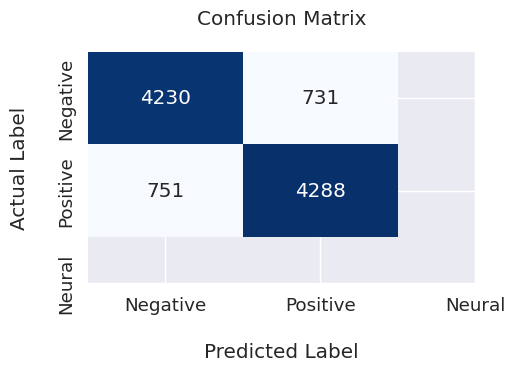

In [ ]:
def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(5, 3))
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=classes, yticklabels=classes)

    plt.title(title, pad=20)
    plt.xlabel('Predicted Label', labelpad=20)
    plt.ylabel('Actual Label', labelpad=20)
    plt.show()


plot_confusion_matrix(cm,
                      classes=["Negative", "Positive","Neural"],
                      title="Confusion Matrix")

In [ ]:
!pip install transformers datasets torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.6 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification

# Load BERT tokenizer and model (for binary classification)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
!pip install dataset

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.35
    Uninstalling SQLAlchemy-2.0.35:
      Successfully uninstalled SQLAlchemy-2.0.35
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.54 which is incompatible.


In [ ]:
!pip install --upgrade pyarrow

In [ ]:
from transformers import BertTokenizer
from datasets import load_dataset

# Load dataset
dataset = load_dataset('csv', data_files={'train': '/content/drive/MyDrive/Colab Notebooks/IMDB Dataset.csv'})

# Tokenize the dataset
def tokenize_function(examples):

    return tokenizer(examples['sentiment'], padding="max_length", truncation=True)

# Apply tokenization
tokenized_datasets = dataset.map(tokenize_function, batched=True)

Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
data = {'reviews': ['positive', 'negative', 'positive', 'negative']}
df = pd.DataFrame(data)

# Map reviews to integers
mapping = {'positive': 1, 'negative': 0}
df['reviews'] = df['reviews'].map(mapping)

print(df)


   reviews
0        1
1        0
2        1
3        0


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sample data:
texts = [
    "I loved the movie, it was fantastic!",
    "The film was boring and way too long.",
    "Amazing acting, great plot!",
    "Terrible movie, would not recommend."
]
labels = [1, 0, 1, 0]  # 1: positive, 0: negative

# Split data into train and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2)

# Tokenization using BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize with padding and truncation
train_encodings = tokenizer(train_texts, truncation=True, padding=True, return_tensors='pt')
val_encodings = tokenizer(val_texts, truncation=True, padding=True, return_tensors='pt')

# Create Dataset Class
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create DataLoader for batching
train_dataset = SentimentDataset(train_encodings, train_labels)
val_dataset = SentimentDataset(val_encodings, val_labels)

train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=2, shuffle=False)

# Load BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Move model to GPU if available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# Optimizer and Loss Function
optimizer = AdamW(model.parameters(), lr=5e-5)

# Training Loop
model.train()
for epoch in range(3):
    for batch in train_dataloader:
        optimizer.zero_grad()

        batch = {k: v.to(device) for k, v in batch.items()}

        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()

        # Update weights
        optimizer.step()

    print(f"Epoch {epoch + 1} complete. Loss: {loss.item()}")


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1 complete. Loss: 0.8647879958152771
Epoch 2 complete. Loss: 0.4598817229270935
Epoch 3 complete. Loss: 0.6060914397239685


In [ ]:
model.eval()
predictions, true_labels = [], []

for batch in val_dataloader:
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)

    logits = outputs.logits
    predicted_labels = torch.argmax(logits, dim=1).cpu().numpy()
    label_ids = batch['labels'].cpu().numpy()

    predictions.extend(predicted_labels)
    true_labels.extend(label_ids)

# Step 9: Calculate Accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Accuracy: 1.0000


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset

dataset = load_dataset("glue", "mrpc")  # Load the MRPC dataset
train_dataset = dataset['train']
test_dataset = dataset['test']

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the datasets
def tokenize_function(examples):
    return tokenizer(examples['sentence1'], examples['sentence2'], padding='max_length', truncation=True, clean_up_tokenization_spaces=True)

tokenized_train = train_dataset.map(tokenize_function, batched=True)
tokenized_test = test_dataset.map(tokenize_function, batched=True)

# Load the BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
)

# Define a Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
)

# Train the model
trainer.train()

# Evaluate the model
results = trainer.evaluate()
print("Evaluation results:", results)


README.md:   0%|          | 0.00/35.3k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/649k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/75.7k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/308k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3668 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/408 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1725 [00:00<?, ? examples/s]

Map:   0%|          | 0/3668 [00:00<?, ? examples/s]

Streaming output truncated to the last 5000 lines.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.


Map:   0%|          | 0/1725 [00:00<?, ? examples/s]

Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': 

Epoch,Training Loss,Validation Loss
1,No log,0.403541
2,0.519400,0.542207
3,0.276600,0.713413


Evaluation results: {'eval_loss': 0.7134132981300354, 'eval_runtime': 51.1996, 'eval_samples_per_second': 33.692, 'eval_steps_per_second': 4.219, 'epoch': 3.0}


In [ ]:
def test_model(sentence):
  sentence = save_cv.transform([sentence])
  predicted_sentiment = model.predict(sentence)[0]
  return predicted_sentiment

In [ ]:
sentence = 'This is the best movie  of my life ever'
predicted_sentiment = test_model(sentence)
print(predicted_sentiment)

positive


In [ ]:
sentence = 'This is the worse movie  of my life ever'
predicted_sentiment = test_model(sentence)
print(predicted_sentiment)

negative


In [ ]:
sentence = 'I hate the movie '
predicted_sentiment = test_model(sentence)
print(predicted_sentiment)

negative


In [ ]:
sentence = "I am going to have to disagree with the previous comment and side with Maltin on this one. This is a second rate, excessively vicious Western that creaks and groans trying to put across its central theme of the Wild West being tamed and kicked aside by the steady march of time. It would like to be in the tradition of 'Butch Cassidy and the Sundance Kid', but lacks that film's poignancy and charm. Andrew McLaglen's direction is limp, and the final 30 minutes or so are a real botch, with some incomprehensible strategy on the part of heroes Charlton Heston and Chris Mitchum. (Someone give me a holler if you can explain to me why they set that hillside on fire.) There was something callous about the whole treatment of the rape scene, and the woman's reaction afterwards certainly did not ring true. Coburn is plenty nasty as the half breed escaped convict out for revenge, but all of his fellow escapees are underdeveloped (they're like bowling pins to be knocked down one by one as the story lurches forward). Michael Parks gives one of his typically shifty, lethargic, mumbling performances, but in this case it was appropriate as his modern style sheriff symbolizes the complacency that technological progress can bring about."
predicted_sentiment = test_model(sentence)
print(predicted_sentiment)

positive


In [ ]:
sentence = ' If you like original gut wrenching laughter you will like this movie. If you are young or old then you will love this movie, hell even my mom like it'
predicted_sentiment = test_model(sentence)
print(predicted_sentiment)

negative


In [ ]:
import nltk
#Download VADER lexicon
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sent_analysis = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
import pickle
from nltk.sentiment import SentimentIntensityAnalyzer

sent_analysis = SentimentIntensityAnalyzer()

with open('/content/drive/MyDrive/sentiment_analysis.pkl', 'wb') as file:
    pickle.dump(sent_analysis, file)


In [ ]:
sentiment_scores = sent_analysis.polarity_scores('Best Movie Ever')

print('Sentiment Analysis Values:')
for key, value in sentiment_scores.items():
    print(f"{key.capitalize()}: {value:.3f}")


Sentiment Analysis Values:
Neg: 0.000
Neu: 0.323
Pos: 0.677
Compound: 0.637


In [ ]:
import os

# Print current working directory
print("/content/Count-vectorzier.plk:", os.getcwd())

# List files in the current working directory
print("Files in the current working directory:", os.listdir())


/content/Count-vectorzier.plk: /content
Files in the current working directory: ['.config', 'sentiment_model.joblib', 'Movie_Reviews_Sentiment_Analysis.pkl', 'Count-vectorizer.pkl', 'sentiment_model.pkl', 'sentiment_model', 'drive', 'sample_data']


Save the Models

In [ ]:
import pickle  # Import the pickle module
# Save the CountVectorizer and the model
pickle.dump(cv, open('Count-vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('Movie_Reviews_Sentiment_Analysis.pkl', 'wb'))


In [ ]:
import pickle
# Load the CountVectorizer and model from pickle files
save_cv = pickle.load(open('Count-vectorizer.pkl', 'rb'))
model = pickle.load(open('Movie_Reviews_Sentiment_Analysis.pkl', 'rb'))


In [ ]:
from transformers import BertModel, BertTokenizer
model_name = 'bert-base-uncased'
bert_model = BertModel.from_pretrained(model_name)
tokenizer = BertTokenizer.from_pretrained(model_name)

# Save the model and tokenizer
bert_model.save_pretrained("./sentiment_model")
tokenizer.save_pretrained("./sentiment_model")

('./sentiment_model/tokenizer_config.json',
 './sentiment_model/special_tokens_map.json',
 './sentiment_model/vocab.txt',
 './sentiment_model/added_tokens.json')